## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    x = input_layer
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1))(x)
        x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

dropout_ratio_list = [0.0, 0.1, 0.25, 0.5, 0.75]
num_neurons_list = [[512, 256, 128], [512, 256, 128, 64], [512, 256, 128, 64, 32]]

In [7]:
KEY_PREFIX_LAYERS = 'n_hl'
KEY_PREFIX_DROPOUT = 'dr'

results = {}

for num_neurons in num_neurons_list:
    n_layers = len(num_neurons)
    for drp_ratio in dropout_ratio_list:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ratio, num_neurons=num_neurons)
        print(model.summary())

        print()
        print('-'*60)
        print(f"Experiment with n_hidden_layers = {n_layers}  droupout_ratio={drp_ratio}")
        print()

        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = f"{KEY_PREFIX_LAYERS}:{n_layers}-{KEY_PREFIX_DROPOUT}:{drp_ratio}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
drop

50000/50000 [==============================] - 10s 205us/step - loss: 0.9477 - acc: 0.6663 - val_loss: 1.4839 - val_acc: 0.4980
Epoch 45/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.9379 - acc: 0.6718 - val_loss: 1.3954 - val_acc: 0.5278
Epoch 46/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.9254 - acc: 0.6761 - val_loss: 1.4049 - val_acc: 0.5230
Epoch 47/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.9148 - acc: 0.6794 - val_loss: 1.4293 - val_acc: 0.5166
Epoch 48/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.9017 - acc: 0.6840 - val_loss: 1.4030 - val_acc: 0.5193
Epoch 49/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.8909 - acc: 0.6897 - val_loss: 1.4042 - val_acc: 0.5210
Epoch 50/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.8799 - acc: 0.6910 - val_loss: 1.4345 - val_acc: 0.5185
Instructions for updating:
Pleas

Epoch 39/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.1939 - acc: 0.5777 - val_loss: 1.2999 - val_acc: 0.5366
Epoch 40/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.1807 - acc: 0.5812 - val_loss: 1.3086 - val_acc: 0.5404
Epoch 41/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.1711 - acc: 0.5825 - val_loss: 1.3106 - val_acc: 0.5348
Epoch 42/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.1659 - acc: 0.5863 - val_loss: 1.3054 - val_acc: 0.5374
Epoch 43/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.1599 - acc: 0.5878 - val_loss: 1.3072 - val_acc: 0.5383
Epoch 44/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.1482 - acc: 0.5920 - val_loss: 1.2957 - val_acc: 0.5384
Epoch 45/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.1429 - acc: 0.5938 - val_loss: 1.2978 - val_acc: 0.5380
Epoch 46/50
50000/50

50000/50000 [==============================] - 11s 226us/step - loss: 1.3781 - acc: 0.5088 - val_loss: 1.3615 - val_acc: 0.5150
Epoch 37/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.3701 - acc: 0.5106 - val_loss: 1.3601 - val_acc: 0.5113
Epoch 38/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.3609 - acc: 0.5158 - val_loss: 1.3502 - val_acc: 0.5193
Epoch 39/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3594 - acc: 0.5132 - val_loss: 1.3476 - val_acc: 0.5168
Epoch 40/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.3452 - acc: 0.5182 - val_loss: 1.3389 - val_acc: 0.5221
Epoch 41/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3383 - acc: 0.5230 - val_loss: 1.3490 - val_acc: 0.5139
Epoch 42/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.3391 - acc: 0.5228 - val_loss: 1.3312 - val_acc: 0.5237
Epoch 43/50
50000/50000 [=======

50000/50000 [==============================] - 11s 229us/step - loss: 1.6668 - acc: 0.4017 - val_loss: 1.5413 - val_acc: 0.4519
Epoch 34/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.6637 - acc: 0.4001 - val_loss: 1.5336 - val_acc: 0.4582
Epoch 35/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.6520 - acc: 0.4085 - val_loss: 1.5294 - val_acc: 0.4563
Epoch 36/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.6516 - acc: 0.4086 - val_loss: 1.5173 - val_acc: 0.4596
Epoch 37/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.6418 - acc: 0.4113 - val_loss: 1.5139 - val_acc: 0.4578
Epoch 38/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.6403 - acc: 0.4092 - val_loss: 1.5293 - val_acc: 0.4535
Epoch 39/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.6341 - acc: 0.4119 - val_loss: 1.5108 - val_acc: 0.4582
Epoch 40/50
50000/50000 [=======

50000/50000 [==============================] - 11s 228us/step - loss: 2.1417 - acc: 0.1763 - val_loss: 2.1732 - val_acc: 0.1607
Epoch 31/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.1413 - acc: 0.1772 - val_loss: 2.1777 - val_acc: 0.1619
Epoch 32/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.1384 - acc: 0.1774 - val_loss: 2.1806 - val_acc: 0.1540
Epoch 33/50
50000/50000 [==============================] - 11s 229us/step - loss: 2.1360 - acc: 0.1768 - val_loss: 2.1650 - val_acc: 0.1673
Epoch 34/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.1342 - acc: 0.1782 - val_loss: 2.2014 - val_acc: 0.1483
Epoch 35/50
50000/50000 [==============================] - 12s 230us/step - loss: 2.1267 - acc: 0.1792 - val_loss: 2.1769 - val_acc: 0.1590
Epoch 36/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.1215 - acc: 0.1789 - val_loss: 2.1891 - val_acc: 0.1505
Epoch 37/50
50000/50000 [=======

50000/50000 [==============================] - 10s 205us/step - loss: 1.1479 - acc: 0.5952 - val_loss: 1.3280 - val_acc: 0.5291
Epoch 26/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.1295 - acc: 0.6001 - val_loss: 1.3440 - val_acc: 0.5248
Epoch 27/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.1188 - acc: 0.6027 - val_loss: 1.4248 - val_acc: 0.5044
Epoch 28/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.1032 - acc: 0.6062 - val_loss: 1.3781 - val_acc: 0.5204
Epoch 29/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.0883 - acc: 0.6139 - val_loss: 1.4572 - val_acc: 0.4944
Epoch 30/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.0717 - acc: 0.6193 - val_loss: 1.3709 - val_acc: 0.5190
Epoch 31/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.0557 - acc: 0.6262 - val_loss: 1.3953 - val_acc: 0.5167
Epoch 32/50
50000/50000 [=======

50000/50000 [==============================] - 12s 233us/step - loss: 1.4287 - acc: 0.4888 - val_loss: 1.4052 - val_acc: 0.4973
Epoch 21/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.4217 - acc: 0.4911 - val_loss: 1.3968 - val_acc: 0.5057
Epoch 22/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.4051 - acc: 0.4983 - val_loss: 1.3842 - val_acc: 0.5081
Epoch 23/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.3899 - acc: 0.5040 - val_loss: 1.3951 - val_acc: 0.5043
Epoch 24/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.3822 - acc: 0.5071 - val_loss: 1.3850 - val_acc: 0.5088
Epoch 25/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.3693 - acc: 0.5105 - val_loss: 1.3732 - val_acc: 0.5149
Epoch 26/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.3590 - acc: 0.5142 - val_loss: 1.3718 - val_acc: 0.5097
Epoch 27/50
50000/50000 [=======

50000/50000 [==============================] - 12s 235us/step - loss: 1.6739 - acc: 0.3945 - val_loss: 1.5557 - val_acc: 0.4458
Epoch 16/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.6604 - acc: 0.4013 - val_loss: 1.5490 - val_acc: 0.4552
Epoch 17/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.6425 - acc: 0.4104 - val_loss: 1.5332 - val_acc: 0.4491
Epoch 18/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.6311 - acc: 0.4152 - val_loss: 1.5247 - val_acc: 0.4553
Epoch 19/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.6178 - acc: 0.4187 - val_loss: 1.5172 - val_acc: 0.4598
Epoch 20/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.6058 - acc: 0.4233 - val_loss: 1.5034 - val_acc: 0.4668
Epoch 21/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.5916 - acc: 0.4279 - val_loss: 1.4952 - val_acc: 0.4726
Epoch 22/50
50000/50000 [=======

50000/50000 [==============================] - 12s 234us/step - loss: 2.0626 - acc: 0.2087 - val_loss: 1.9599 - val_acc: 0.2822
Epoch 11/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.0444 - acc: 0.2137 - val_loss: 1.9421 - val_acc: 0.2856
Epoch 12/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.0240 - acc: 0.2204 - val_loss: 1.9287 - val_acc: 0.2952
Epoch 13/50
50000/50000 [==============================] - 12s 233us/step - loss: 2.0121 - acc: 0.2268 - val_loss: 1.9113 - val_acc: 0.2981
Epoch 14/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.9976 - acc: 0.2335 - val_loss: 1.8903 - val_acc: 0.3084
Epoch 15/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.9838 - acc: 0.2425 - val_loss: 1.8744 - val_acc: 0.3076
Epoch 16/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.9749 - acc: 0.2458 - val_loss: 1.8769 - val_acc: 0.3077
Epoch 17/50
50000/50000 [=======

50000/50000 [==============================] - 12s 235us/step - loss: 2.3026 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.0997
Epoch 6/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.3029 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1005
Epoch 7/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.3027 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1014
Epoch 8/50
50000/50000 [==============================] - 12s 236us/step - loss: 2.3028 - acc: 0.0963 - val_loss: 2.3026 - val_acc: 0.1011
Epoch 9/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.3027 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 10/50
50000/50000 [==============================] - 12s 233us/step - loss: 2.3027 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 11/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.3027 - acc: 0.1003 - val_loss: 2.3026 - val_acc: 0.0995
Epoch 12/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 228us/step - loss: 2.1624 - acc: 0.2100 - val_loss: 1.9703 - val_acc: 0.2990
Epoch 2/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.8672 - acc: 0.3399 - val_loss: 1.7893 - val_acc: 0.3666
Epoch 3/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.7401 - acc: 0.3821 - val_loss: 1.6922 - val_acc: 0.3981
Epoch 4/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.6642 - acc: 0.4094 - val_loss: 1.6547 - val_acc: 0.4115
Epoch 5/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.6084 - acc: 0.4288 - val_loss: 1.6630 - val_acc: 0.3990
Epoch 6/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.5615 - acc: 0.4459 - val_loss: 1.6069 - val_acc: 0.4246
Epoch 7/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.5218 - acc: 0.4623 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 271us/step - loss: 2.2635 - acc: 0.1470 - val_loss: 2.1287 - val_acc: 0.2420
Epoch 2/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.0891 - acc: 0.2185 - val_loss: 1.9443 - val_acc: 0.2932
Epoch 3/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.9772 - acc: 0.2662 - val_loss: 1.8661 - val_acc: 0.3263
Epoch 4/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.9070 - acc: 0.2955 - val_loss: 1.8076 - val_acc: 0.3438
Epoch 5/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.8633 - acc: 0.3192 - val_loss: 1.7598 - val_acc: 0.3627
Epoch 6/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.8234 - acc: 0.3327 - val_loss: 1.7251 - val_acc: 0.3760
Epoch 7/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.7911 - acc: 0.3475 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.2973 - acc: 0.1167 - val_loss: 2.2270 - val_acc: 0.1985
Epoch 2/50
50000/50000 [==============================] - 13s 252us/step - loss: 2.2142 - acc: 0.1648 - val_loss: 2.1096 - val_acc: 0.2448
Epoch 3/50
50000/50000 [==============================] - 13s 252us/step - loss: 2.1353 - acc: 0.1995 - val_loss: 2.0319 - val_acc: 0.2659
Epoch 4/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.0754 - acc: 0.2195 - val_loss: 1.9721 - val_acc: 0.2949
Epoch 5/50
50000/50000 [==============================] - 12s 236us/step - loss: 2.0353 - acc: 0.2324 - val_loss: 1.9277 - val_acc: 0.3025
Epoch 6/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.9974 - acc: 0.2477 - val_loss: 1.8991 - val_acc: 0.3086
Epoch 7/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.9703 - acc: 0.2565 - val_loss: 1.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 259us/step - loss: 2.3445 - acc: 0.1011 - val_loss: 2.3023 - val_acc: 0.1014
Epoch 2/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.3031 - acc: 0.1014 - val_loss: 2.3019 - val_acc: 0.1323
Epoch 3/50
50000/50000 [==============================] - 12s 239us/step - loss: 2.2998 - acc: 0.1083 - val_loss: 2.2992 - val_acc: 0.1482
Epoch 4/50
50000/50000 [==============================] - 12s 242us/step - loss: 2.2976 - acc: 0.1108 - val_loss: 2.2893 - val_acc: 0.1579
Epoch 5/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.2901 - acc: 0.1223 - val_loss: 2.2705 - val_acc: 0.1543
Epoch 6/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.2732 - acc: 0.1360 - val_loss: 2.2362 - val_acc: 0.1720
Epoch 7/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.2483 - acc: 0.1481 - val_loss: 2.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 307us/step - loss: 2.5439 - acc: 0.1001 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 13s 250us/step - loss: 2.3030 - acc: 0.1005 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 13s 263us/step - loss: 2.3028 - acc: 0.1006 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.3029 - acc: 0.0995 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.3027 - acc: 0.1008 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.3028 - acc: 0.1003 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 12s 243us/step - loss: 2.3028 - acc: 0.0987 - val_loss: 2.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(results, title=''):
    plt.clf()
    
    NUM_COLORS = len(results.keys())
    cm = plt.get_cmap('gist_rainbow')
    color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
    fig.set_size_inches(24, 8)
    #plt.subplots_adjust(bottom=.05, top=.9, hspace=.9)

    fig.suptitle(title)

    for i, cond in enumerate(results.keys()):
        legend_label = cond
        ax1.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-',  label=legend_label+'_t', color=color_bar[i])
        ax1.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=legend_label+'_v', color=color_bar[i])
    ax1.set_title("Loss")
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

    for i, cond in enumerate(results.keys()):
        legend_label = cond
        ax2.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-',  label=legend_label+'_t', color=color_bar[i])
        ax2.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=legend_label+'_v', color=color_bar[i])
    ax2.set_title("Accuracy")
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
   
    plt.show()

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data_2(results, title=''):
    plt.clf()
    
    NUM_COLORS = len(results.keys())
    cm = plt.get_cmap('gist_rainbow')
    color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
    
    for i, cond in enumerate(results.keys()):
        legend_label = cond
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-',  label=legend_label+'_t', color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=legend_label+'_v', color=color_bar[i])
    plt.title(f"Loss {title}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    plt.clf()
    for i, cond in enumerate(results.keys()):
        legend_label = cond
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-',  label=legend_label+'_t', color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=legend_label+'_v', color=color_bar[i])
    plt.title(f"Accuracy {title}")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()
    
    print('='*80)
    print()

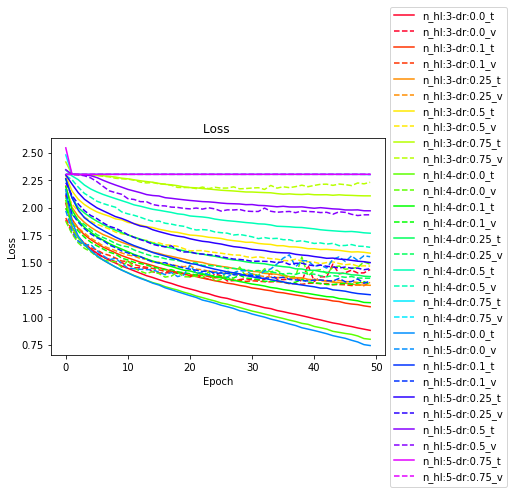

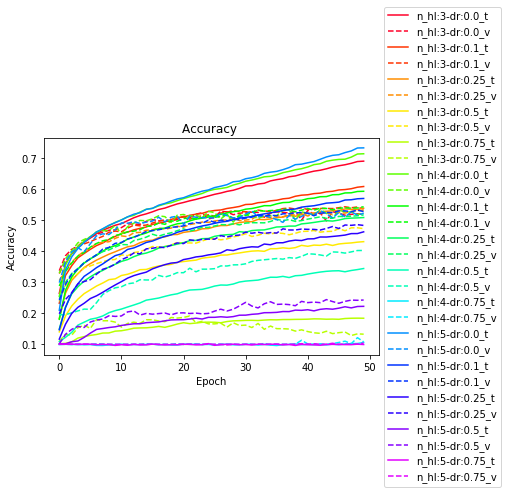

In [10]:
plot_data_2(results)

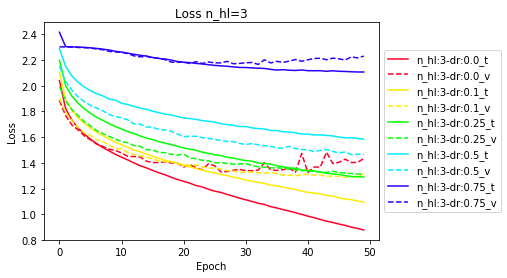

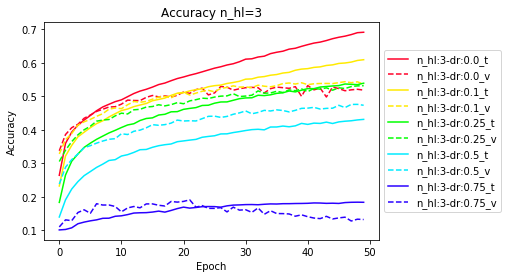

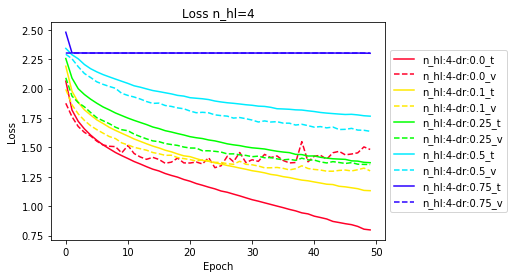

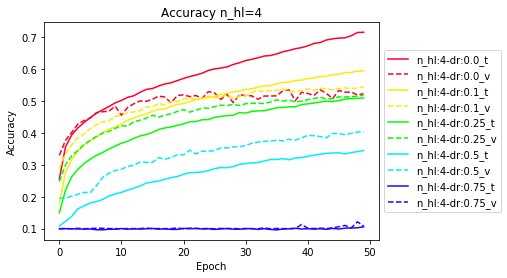

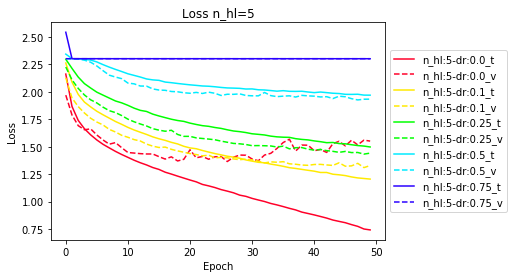

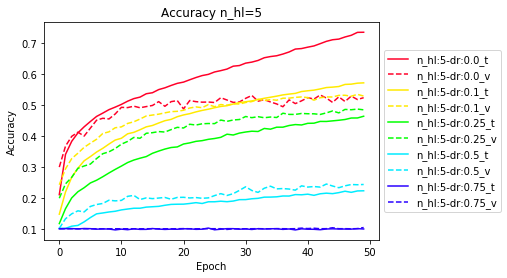

In [11]:
for layers in num_neurons_list:
    n_layer = len(layers)
    results_by_key = {k: v for k, v in results.items() if f'{KEY_PREFIX_LAYERS}:{n_layer}' in k}
    plot_data_2(results_by_key, title=f'{KEY_PREFIX_LAYERS}={n_layer}')

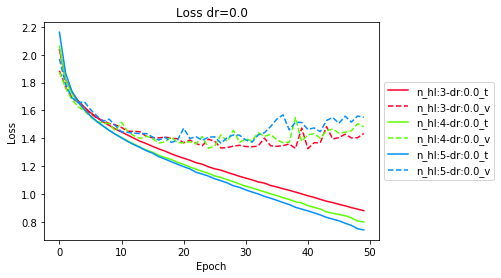

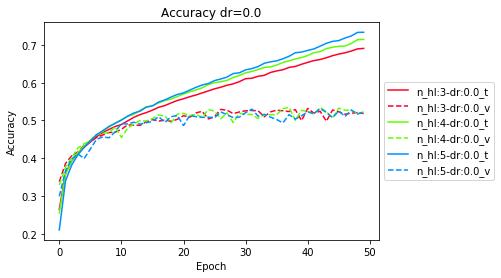

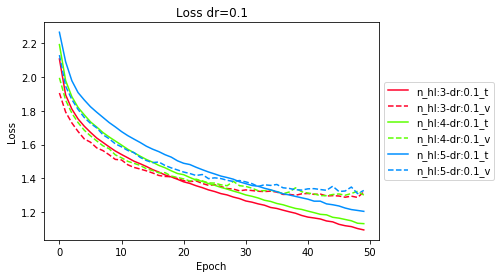

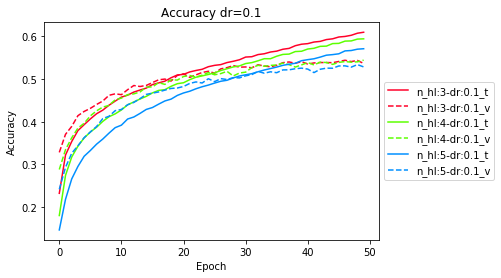

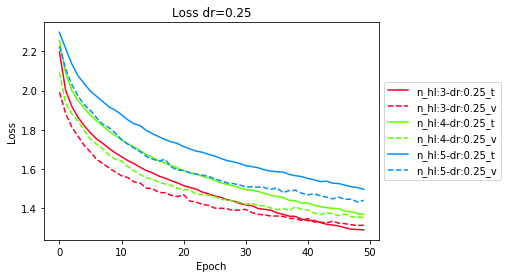

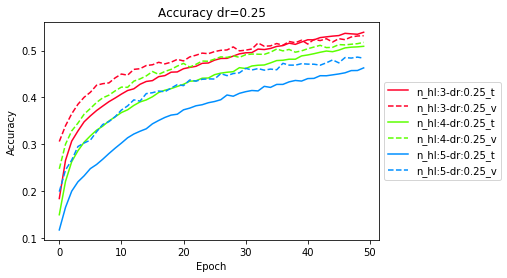

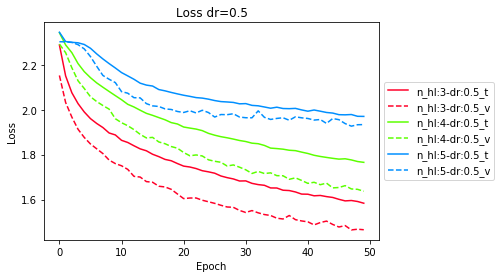

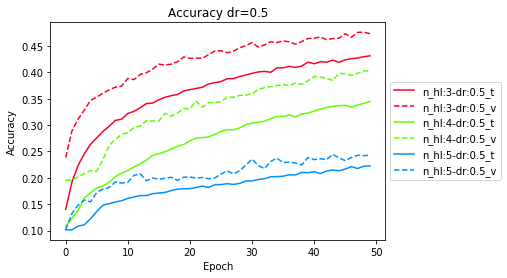

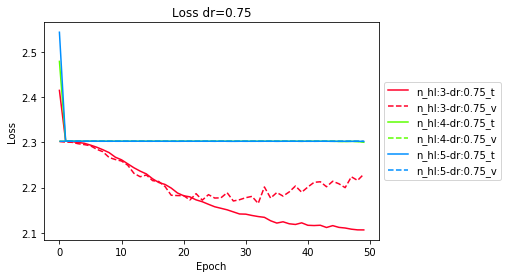

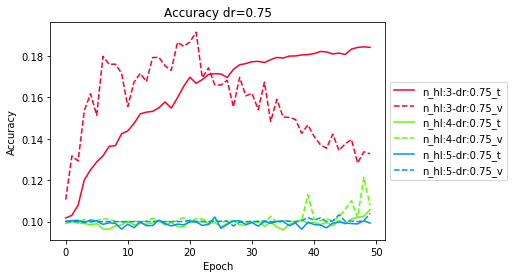

In [12]:
for droupout_ratio in dropout_ratio_list:
    results_by_key = {k: v for k, v in results.items() if f'{KEY_PREFIX_DROPOUT}:{droupout_ratio}' in k}
    plot_data_2(results_by_key, title=f'{KEY_PREFIX_DROPOUT}={droupout_ratio}')

### optimizer 改成使用 Adam 並加上適當的 dropout rate

In [13]:
num_neurons_list = [[512, 256, 128]]

results_adam = {}

for layers in num_neurons_list:
    n_layers = len(layers)
    for drp_ratio in dropout_ratio_list:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ratio, num_neurons=num_neurons)
        model.summary()

        print()
        print('-'*60)
        print(f"Experiment with 'adam' n_hidden_layers = {n_layers}  droupout_ratio={drp_ratio}")
        print()

        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = f"op:adam-{KEY_PREFIX_LAYERS}:{n_layers}-{KEY_PREFIX_DROPOUT}:{drp_ratio}"
        results_adam[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 13s 268us/step - loss: 0.7753 - acc: 0.7204 - val_loss: 1.6150 - val_acc: 0.5122
Epoch 45/50
50000/50000 [==============================] - 16s 324us/step - loss: 0.7718 - acc: 0.7208 - val_loss: 1.6584 - val_acc: 0.5136
Epoch 46/50
50000/50000 [==============================] - 17s 348us/step - loss: 0.7452 - acc: 0.7327 - val_loss: 1.6866 - val_acc: 0.5141
Epoch 47/50
50000/50000 [==============================] - 14s 284us/step - loss: 0.7285 - acc: 0.7366 - val_loss: 1.6557 - val_acc: 0.5106
Epoch 48/50
50000/50000 [==============================] - 14s 278us/step - loss: 0.7202 - acc: 0.7386 - val_loss: 1.7117 - val_acc: 0.5148
Epoch 49/50
50000/50000 [==============================] - 15s 304us/step - loss: 0.7065 - acc: 0.7463 - val_loss: 1.7173 - val_acc: 0.5143
Epoch 50/50
50000/50000 [==============================] - 20s 391us/step - loss: 0.6831 - acc: 0.7541 - val_loss: 1.7457 - val_acc: 0.5118
________________________________

50000/50000 [==============================] - 16s 321us/step - loss: 1.3000 - acc: 0.5387 - val_loss: 1.3834 - val_acc: 0.5106
Epoch 38/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.2986 - acc: 0.5388 - val_loss: 1.3675 - val_acc: 0.5180
Epoch 39/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.2972 - acc: 0.5395 - val_loss: 1.3870 - val_acc: 0.5095
Epoch 40/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.2777 - acc: 0.5460 - val_loss: 1.3668 - val_acc: 0.5160
Epoch 41/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.2788 - acc: 0.5473 - val_loss: 1.3631 - val_acc: 0.5207
Epoch 42/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.2776 - acc: 0.5485 - val_loss: 1.3647 - val_acc: 0.5190
Epoch 43/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.2708 - acc: 0.5508 - val_loss: 1.3714 - val_acc: 0.5199
Epoch 44/50
50000/50000 [=======

50000/50000 [==============================] - 17s 330us/step - loss: 1.7337 - acc: 0.3744 - val_loss: 1.6519 - val_acc: 0.4229
Epoch 31/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.7278 - acc: 0.3754 - val_loss: 1.6667 - val_acc: 0.4120
Epoch 32/50
50000/50000 [==============================] - 17s 332us/step - loss: 1.7266 - acc: 0.3782 - val_loss: 1.6389 - val_acc: 0.4221
Epoch 33/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.7196 - acc: 0.3816 - val_loss: 1.6438 - val_acc: 0.4209
Epoch 34/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.7135 - acc: 0.3840 - val_loss: 1.6265 - val_acc: 0.4270
Epoch 35/50
50000/50000 [==============================] - 17s 349us/step - loss: 1.7150 - acc: 0.3824 - val_loss: 1.6728 - val_acc: 0.4080
Epoch 36/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.7122 - acc: 0.3837 - val_loss: 1.6400 - val_acc: 0.4235
Epoch 37/50
50000/50000 [=======

50000/50000 [==============================] - 17s 332us/step - loss: 2.2846 - acc: 0.1279 - val_loss: 2.2676 - val_acc: 0.1715
Epoch 24/50
50000/50000 [==============================] - 17s 333us/step - loss: 2.2703 - acc: 0.1319 - val_loss: 2.2338 - val_acc: 0.1658
Epoch 25/50
50000/50000 [==============================] - 17s 337us/step - loss: 2.2608 - acc: 0.1314 - val_loss: 2.2158 - val_acc: 0.1753
Epoch 26/50
50000/50000 [==============================] - 17s 348us/step - loss: 2.2545 - acc: 0.1318 - val_loss: 2.1964 - val_acc: 0.1683
Epoch 27/50
50000/50000 [==============================] - 17s 338us/step - loss: 2.2408 - acc: 0.1403 - val_loss: 2.1738 - val_acc: 0.1723
Epoch 28/50
50000/50000 [==============================] - 18s 356us/step - loss: 2.2287 - acc: 0.1405 - val_loss: 2.1910 - val_acc: 0.1634
Epoch 29/50
50000/50000 [==============================] - 19s 387us/step - loss: 2.2139 - acc: 0.1464 - val_loss: 2.1587 - val_acc: 0.1685
Epoch 30/50
50000/50000 [=======

50000/50000 [==============================] - 20s 400us/step - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 20s 397us/step - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 19s 373us/step - loss: 2.3027 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 17s 335us/step - loss: 2.3027 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 18s 364us/step - loss: 2.3027 - acc: 0.0956 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 16s 328us/step - loss: 2.3027 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 15s 297us/step - loss: 2.3027 - acc: 0.0966 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 23/50
50000/50000 [=======

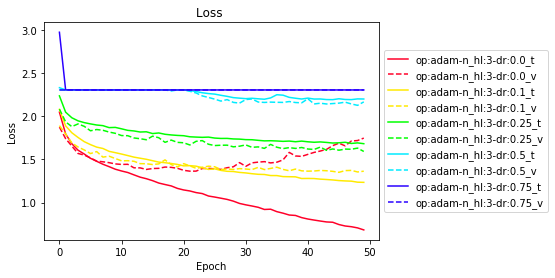

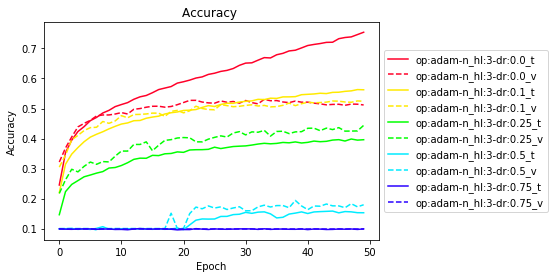

In [14]:
plot_data_2(results_adam)

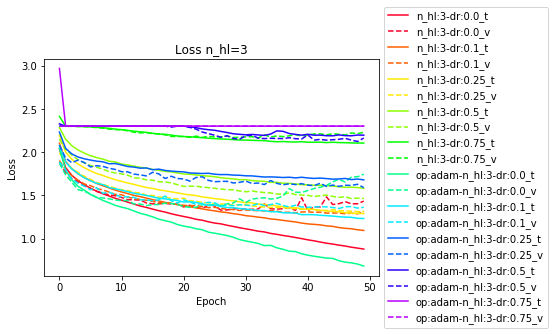

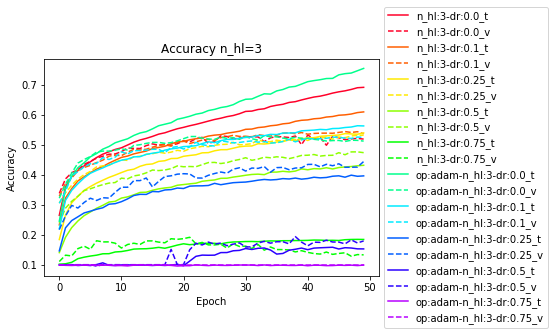

In [15]:
for layers in num_neurons_list:
    # merge
    results_merge = {**results, **results_adam}
    
    n_layer = len(layers)
    results_by_key = {k: v for k, v in results_merge.items() if f'{KEY_PREFIX_LAYERS}:{n_layer}' in k}
    plot_data_2(results_by_key, title=f'{KEY_PREFIX_LAYERS}={n_layer}')

---

<Figure size 432x288 with 0 Axes>

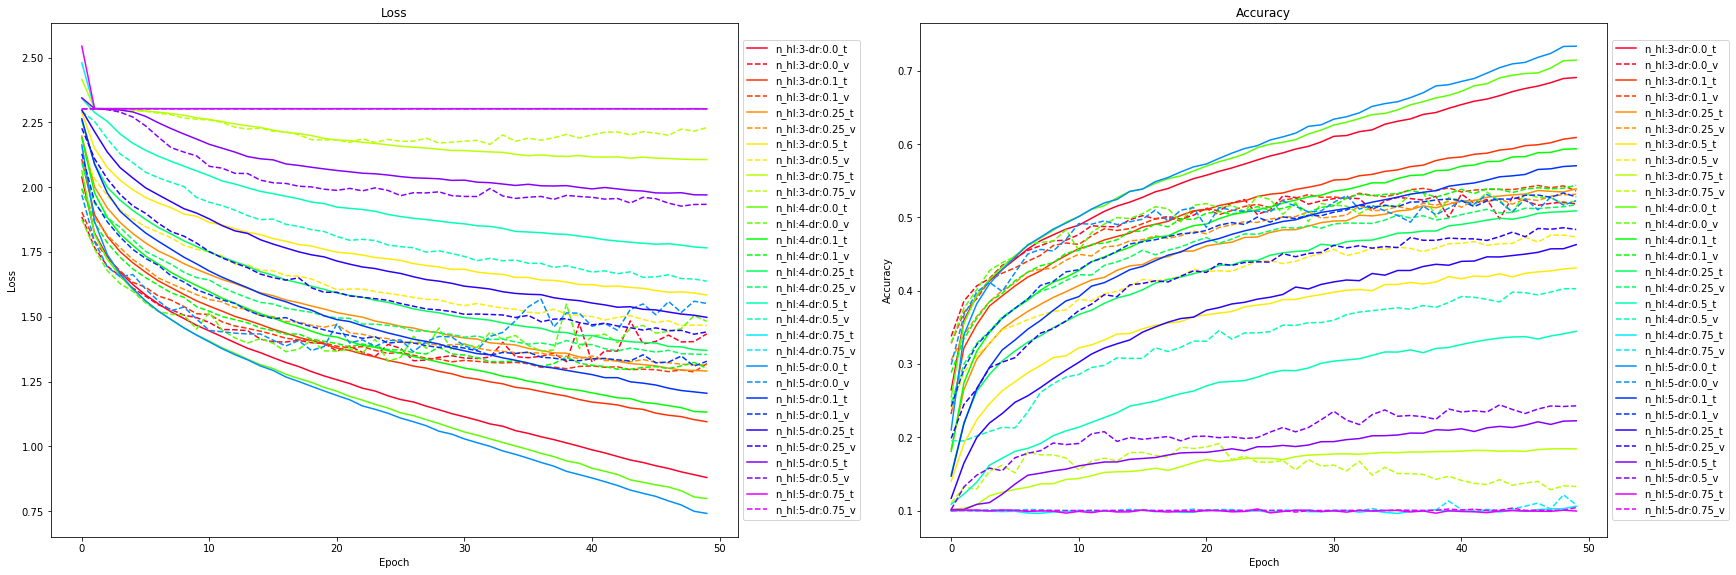

<Figure size 432x288 with 0 Axes>

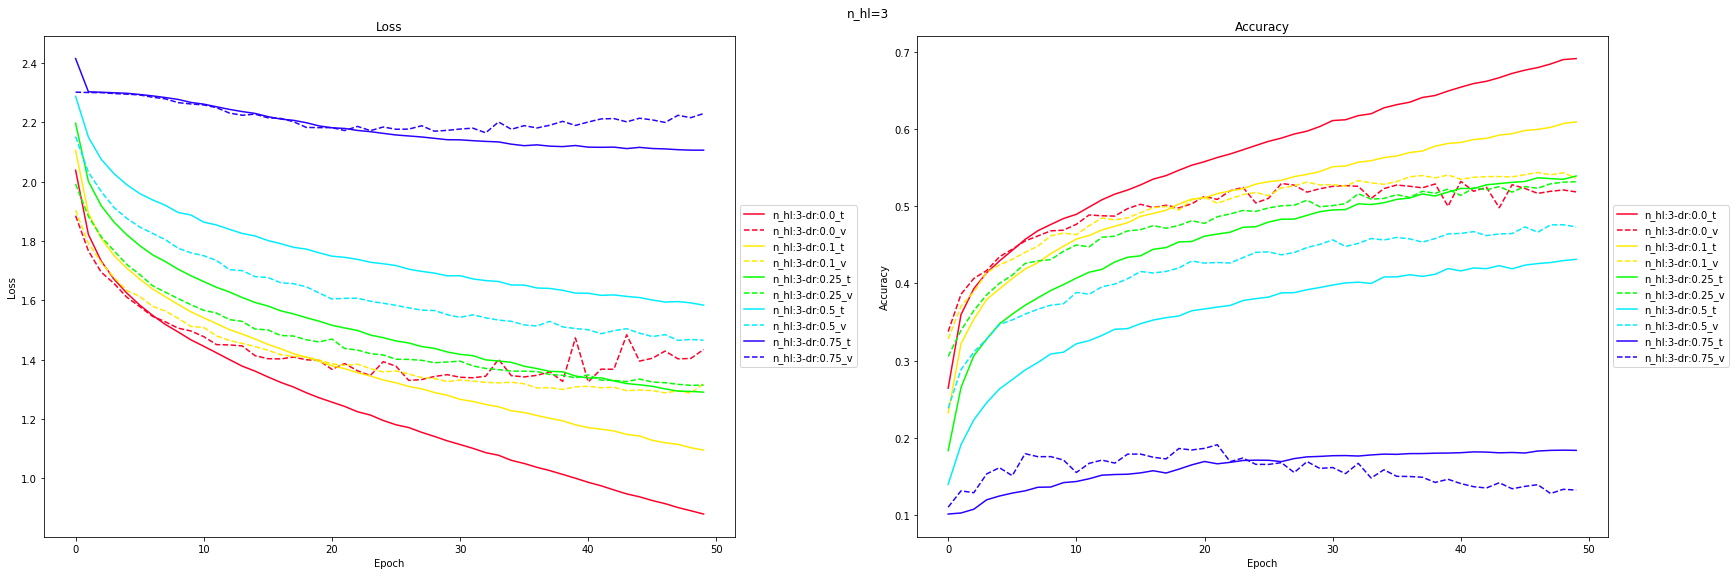

<Figure size 432x288 with 0 Axes>

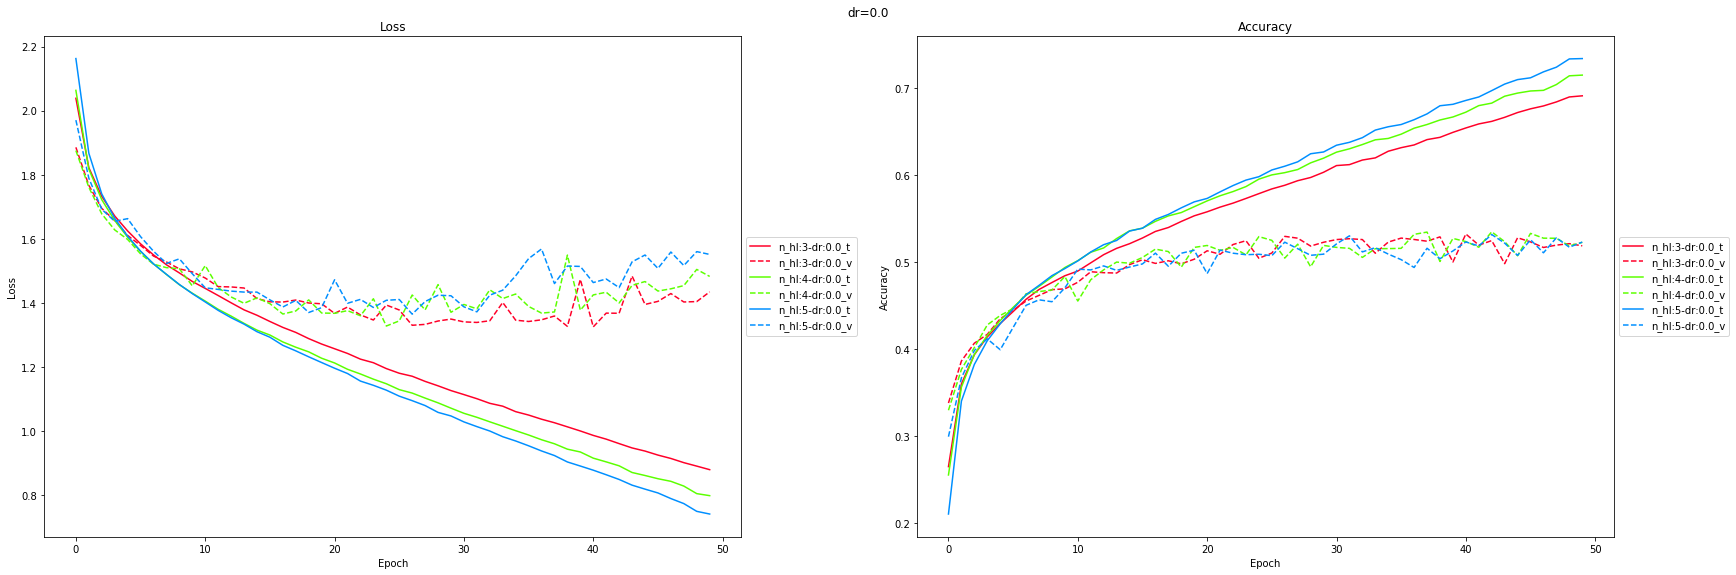

<Figure size 432x288 with 0 Axes>

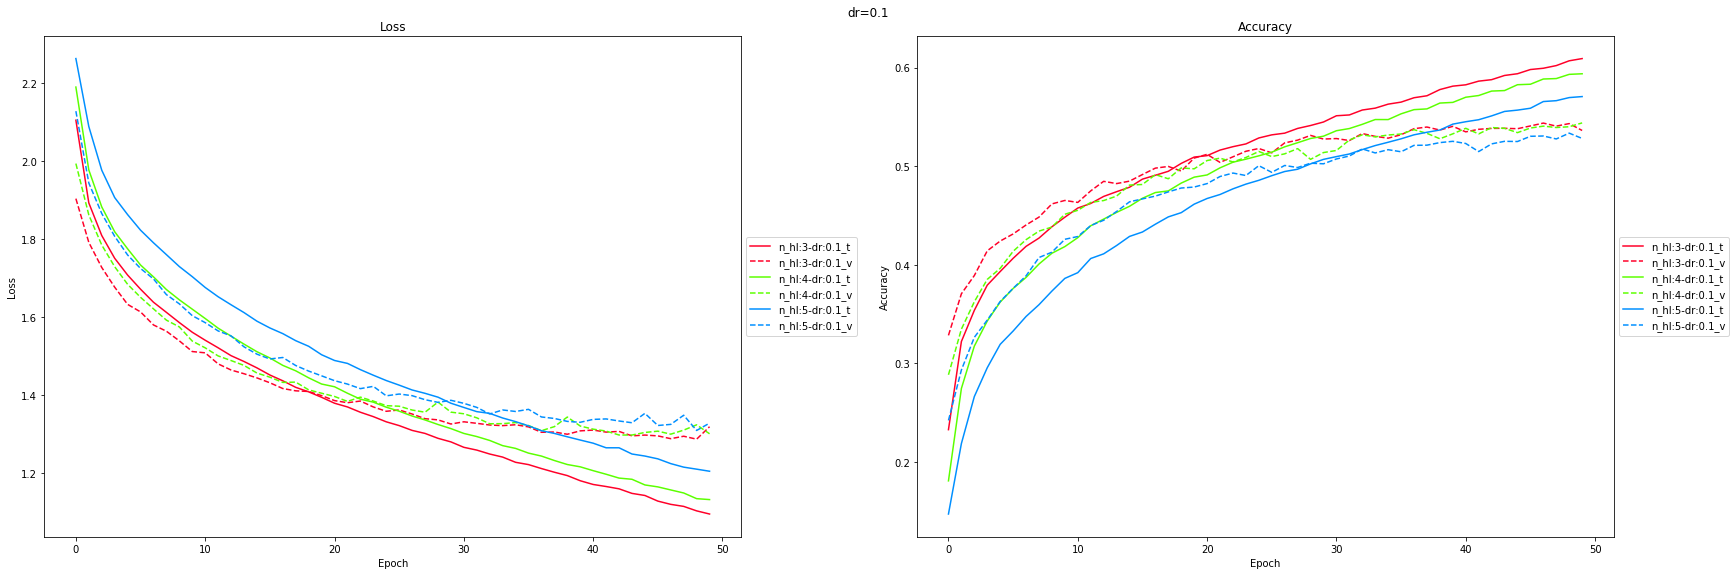

<Figure size 432x288 with 0 Axes>

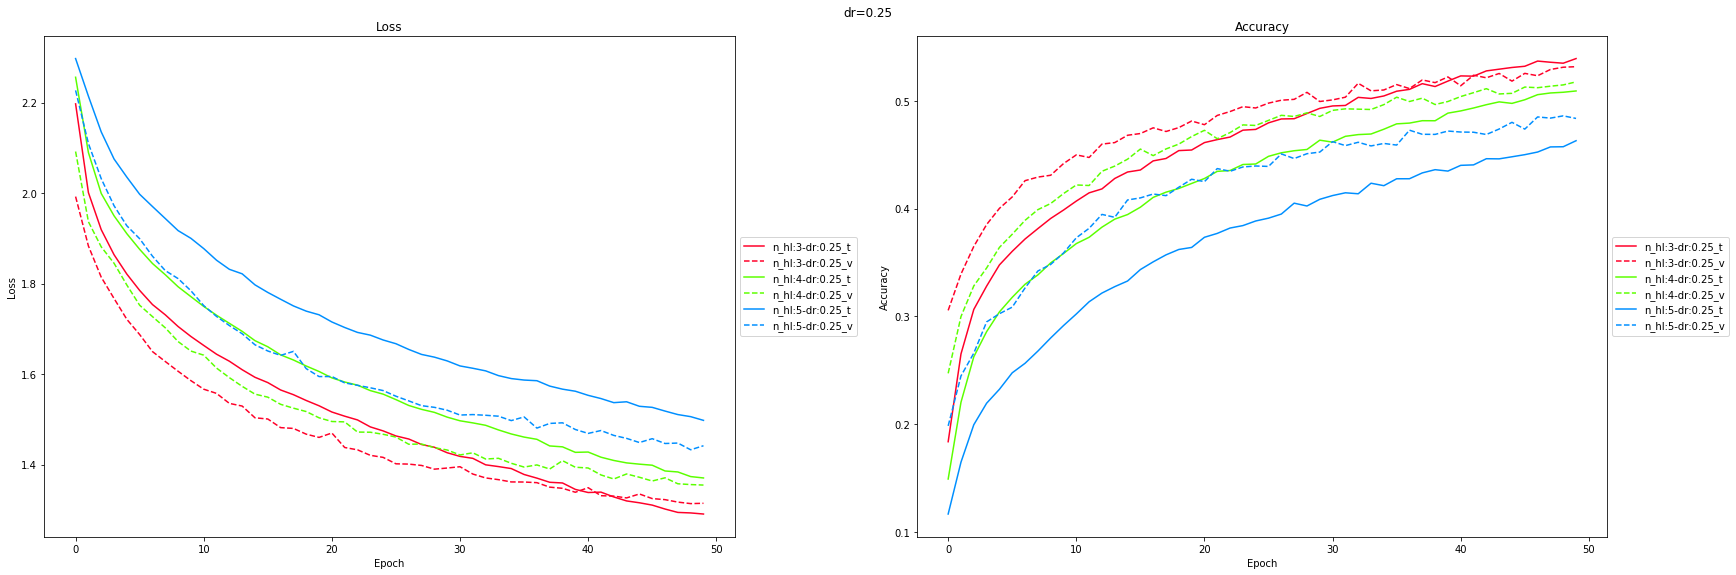

<Figure size 432x288 with 0 Axes>

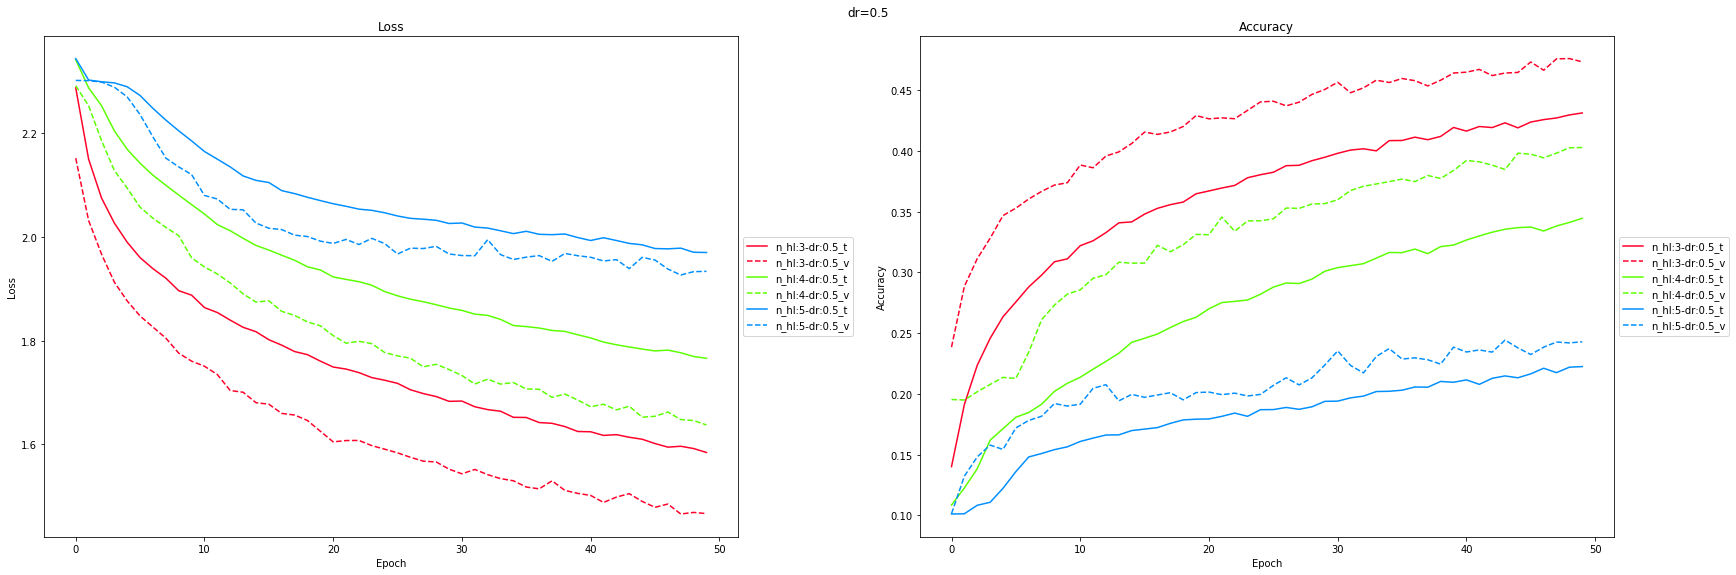

<Figure size 432x288 with 0 Axes>

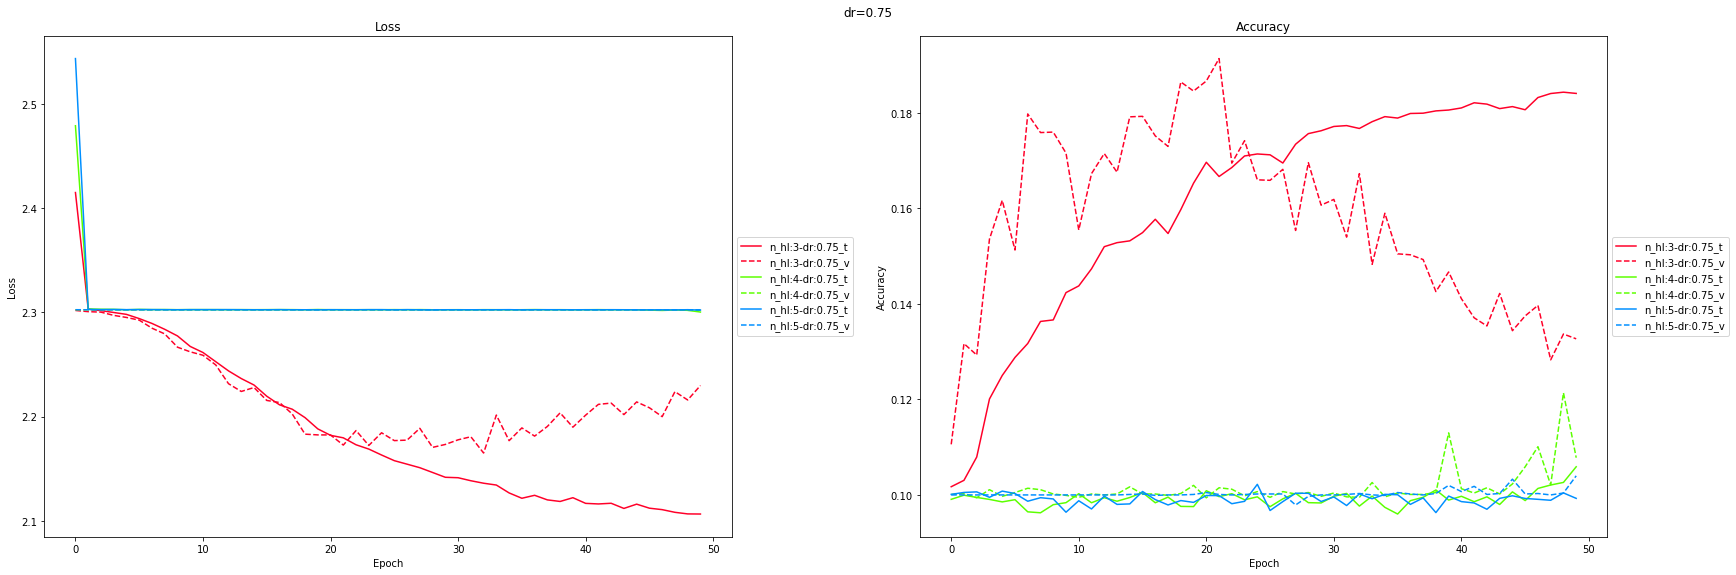

In [16]:
plot_data(results)

for layers in num_neurons_list:
    n_layer = len(layers)
    results_by_key = {k: v for k, v in results.items() if f'{KEY_PREFIX_LAYERS}:{n_layer}' in k}
    plot_data(results_by_key, title=f'{KEY_PREFIX_LAYERS}={n_layer}')

for droupout_ratio in dropout_ratio_list:
    results_by_key = {k: v for k, v in results.items() if f'{KEY_PREFIX_DROPOUT}:{droupout_ratio}' in k}
    plot_data(results_by_key, title=f'{KEY_PREFIX_DROPOUT}={droupout_ratio}')

<Figure size 432x288 with 0 Axes>

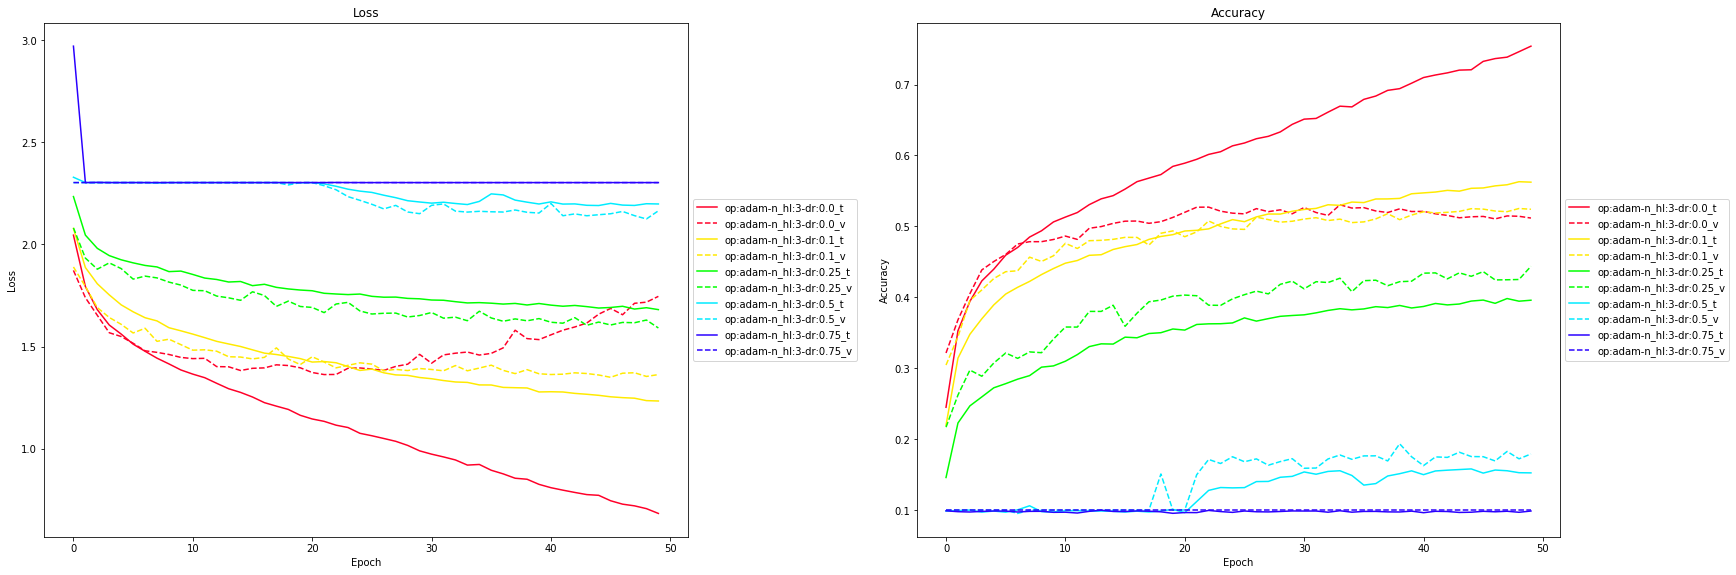

<Figure size 432x288 with 0 Axes>

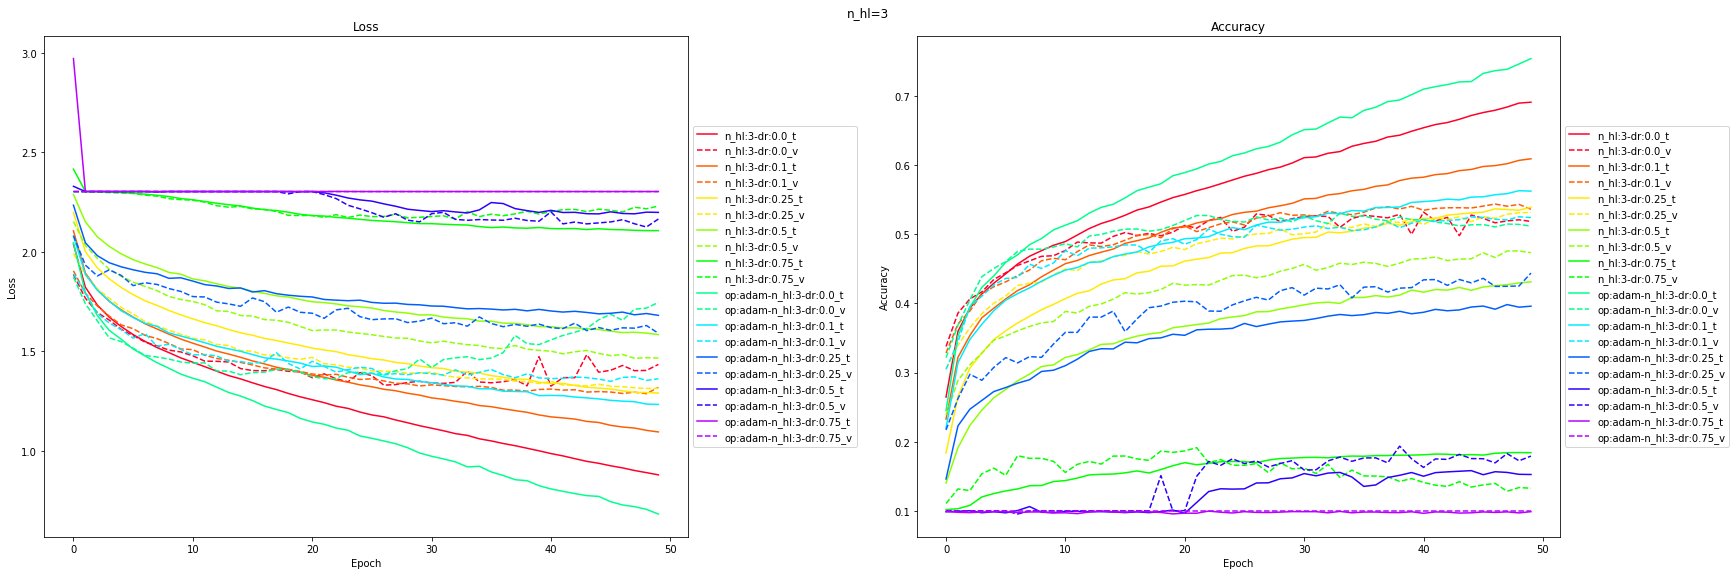

In [17]:
plot_data(results_adam)

for layers in num_neurons_list:
    # merge
    results_merge = {**results, **results_adam}
    
    n_layer = len(layers)
    results_by_key = {k: v for k, v in results_merge.items() if f'{KEY_PREFIX_LAYERS}:{n_layer}' in k}
    plot_data(results_by_key, title=f'{KEY_PREFIX_LAYERS}={n_layer}')